1. Randomly select the centroid, selct number of clusters
2. Find the distance from centers
3. Assign data points to respective centers min distance
4. Re adjust the centers
5. till no change in mean

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('driver-data.csv')

In [ ]:
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
data.shape

(4000, 3)

In [ ]:
data.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [ ]:
data= data.drop('id', axis=1)

In [ ]:
data

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


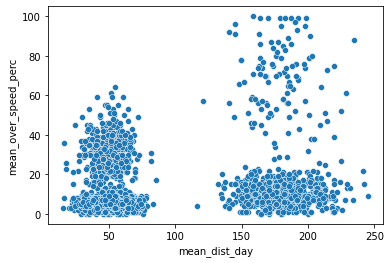

In [ ]:
sns.scatterplot(data['mean_dist_day'],data['mean_over_speed_perc'])

In [ ]:
# elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)

12184626.12962798
1316420.8509477177
992634.0606702471
719601.5383469043
534638.1242580623
372863.5404204057
319754.80359633965
276956.7916755324
254277.27150521998
230113.21023794985


Text(0.5, 1.0, 'elbow method')

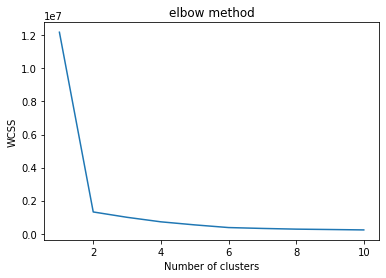

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('elbow method')

In [ ]:
# optimal numbers =2
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)


In [ ]:
kmeans.fit(data)

KMeans(n_clusters=2)

In [ ]:
y_pred=kmeans.predict(data)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [ ]:
pred_df = pd.DataFrame(y_pred.tolist())

In [ ]:
pred_df.value_counts()

0    3200
1     800
dtype: int64

In [ ]:
# append cluster number to every driver
data['cluster_number']=y_pred

In [ ]:
data

,mean_dist_day,mean_over_speed_perc,cluster_number
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0
...,...,...,...
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1


In [ ]:
# save the model
import joblib
joblib.dump(kmeans,'kmeans.sav')

['kmeans.sav']

In [ ]:
model=joblib.load('kmeans.sav')

In [ ]:
mean_dist_day=70
mean_over_speed=80
pred=model.predict([[mean_dist_day,mean_over_speed]])
print(pred)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
df1=data[data.cluster_number==0]
df2=data[data.cluster_number==1]

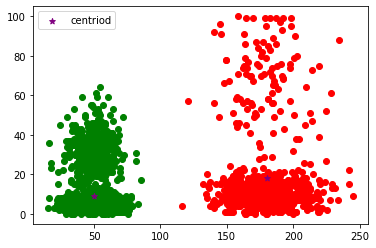

In [ ]:
# visualize the clusters
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='g')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='r')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centriod')
plt.legend()
plt.show()